In [ ]:
# Install Essential Libraries
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

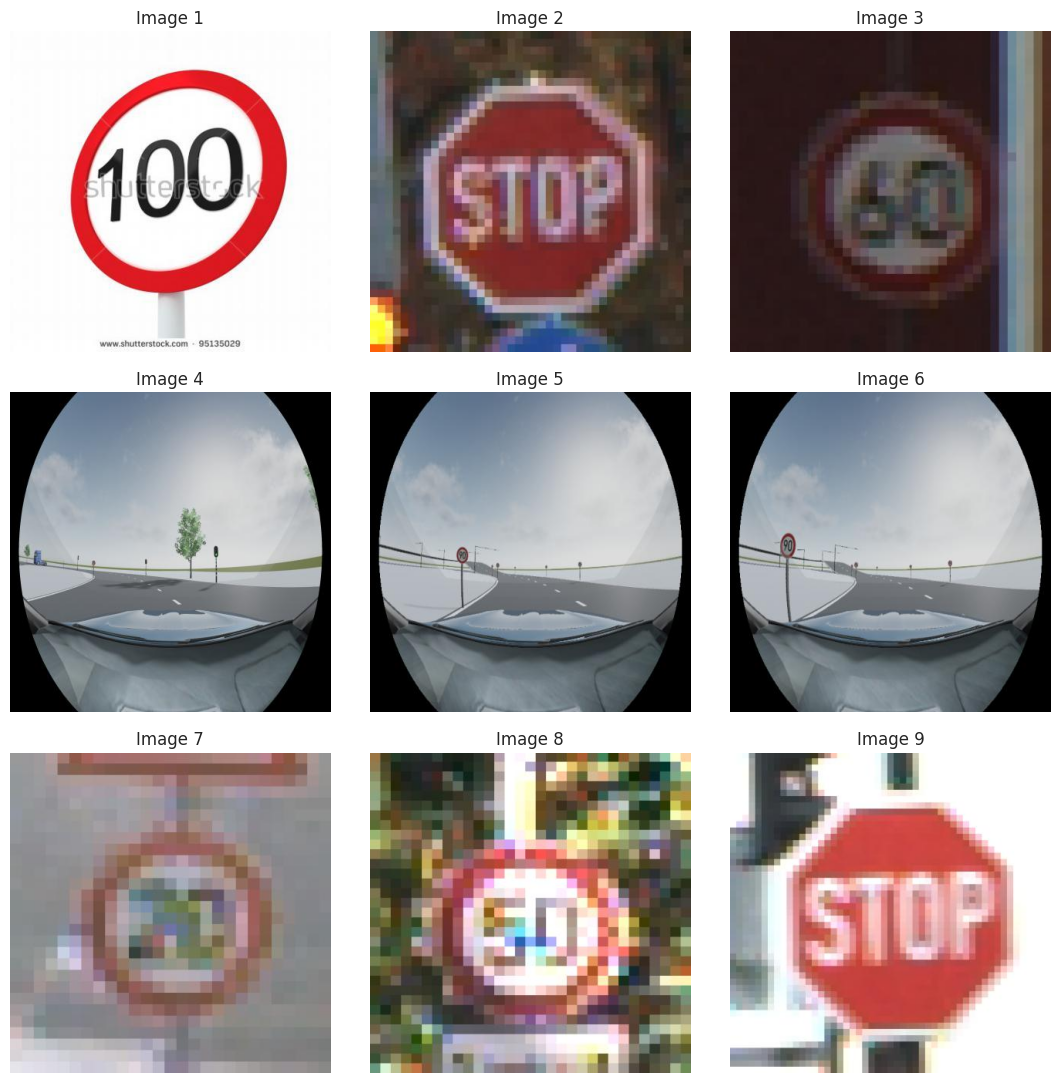

In [ ]:
Image_dir = '/content/drive/MyDrive/trafficsign/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Get the size of the image
image = cv2.imread("/content/drive/MyDrive/trafficsign/car/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 /content/drive/MyDrive/trafficsign/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 16.3ms
Speed: 13.0ms preprocess, 16.3ms inference, 131.0ms postprocess per image at shape (1, 3, 640, 640)


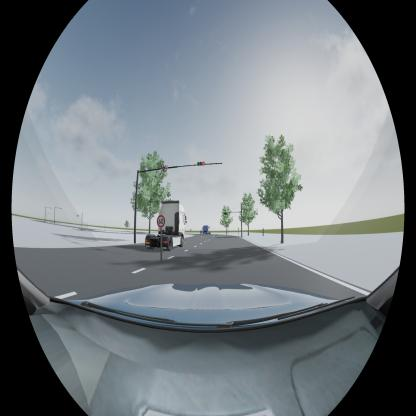

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/drive/MyDrive/trafficsign/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 13.9 MB/s eta 0:00:00


In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/drive/MyDrive/trafficsign/car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/trafficsign/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

100%|██████████| 755k/755k [00:00<00:00, 106MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/trafficsign/car/train/labels... 3530 images, 23 backgrounds, 0 corrupt: 100%|██████████| 3550/3550 [1:16:55<00:00,  1.30s/it]


train: New cache created: /content/drive/MyDrive/trafficsign/car/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/trafficsign/car/valid/labels... 801 images, 6 backgrounds, 0 corrupt: 100%|██████████| 807/807 [09:08<00:00,  1.47it/s]


val: New cache created: /content/drive/MyDrive/trafficsign/car/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005546875000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      10.2G     0.8688      3.768      1.216        156        640: 100%|██████████| 50/50 [01:30<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.14s/it]


                   all        807        944     0.0437      0.764      0.135      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.37G     0.7364      2.694      1.095        155        640: 100%|██████████| 50/50 [01:27<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:18<00:00,  3.15s/it]

                   all        807        944      0.316      0.513      0.283       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       9.4G     0.7256      2.239      1.071        168        640: 100%|██████████| 50/50 [01:28<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.64s/it]


                   all        807        944      0.452      0.481      0.468      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      9.41G     0.7097      1.904      1.059        150        640: 100%|██████████| 50/50 [01:27<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.28s/it]


                   all        807        944      0.586      0.604      0.631      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.35G      0.702      1.628      1.051        139        640: 100%|██████████| 50/50 [01:21<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:17<00:00,  2.99s/it]

                   all        807        944      0.662      0.656      0.694      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.36G     0.6729      1.408      1.038        155        640: 100%|██████████| 50/50 [01:19<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<00:00,  2.35s/it]

                   all        807        944      0.802      0.707      0.793      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.34G     0.6521      1.254      1.016        143        640: 100%|██████████| 50/50 [01:23<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.17s/it]

                   all        807        944       0.86      0.724      0.827      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       9.4G     0.6386      1.151      1.016        176        640: 100%|██████████| 50/50 [01:25<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.80s/it]

                   all        807        944       0.82      0.783       0.86      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      9.34G     0.6389      1.077      1.017        139        640: 100%|██████████| 50/50 [01:24<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.74s/it]

                   all        807        944      0.881      0.739      0.859      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.36G     0.6202      1.006          1        160        640: 100%|██████████| 50/50 [01:26<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.22s/it]

                   all        807        944      0.877      0.765      0.871       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      9.36G     0.6179      0.973     0.9978        187        640: 100%|██████████| 50/50 [01:23<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<00:00,  2.42s/it]

                   all        807        944      0.844      0.814      0.885      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       9.4G     0.6096     0.9039     0.9924        164        640: 100%|██████████| 50/50 [01:20<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.13s/it]

                   all        807        944      0.887      0.843      0.906      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      9.36G     0.6028     0.8668     0.9911        160        640: 100%|██████████| 50/50 [01:24<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.93s/it]

                   all        807        944      0.945      0.824      0.922      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      9.34G     0.5948     0.8456     0.9959        152        640: 100%|██████████| 50/50 [01:27<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]

                   all        807        944      0.909      0.798      0.902      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      9.36G     0.5906     0.7953     0.9823        161        640: 100%|██████████| 50/50 [01:27<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.24s/it]

                   all        807        944      0.931      0.821      0.913      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      9.36G     0.5736     0.7789     0.9826        170        640: 100%|██████████| 50/50 [01:24<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<00:00,  2.35s/it]

                   all        807        944      0.928      0.858      0.924      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      9.36G     0.5641     0.7416     0.9764        140        640: 100%|██████████| 50/50 [01:20<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:15<00:00,  2.63s/it]

                   all        807        944      0.946      0.836      0.924      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      9.37G     0.5597     0.7193     0.9727        138        640: 100%|██████████| 50/50 [01:22<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.11s/it]

                   all        807        944      0.891      0.877       0.93      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      9.34G     0.5638     0.7215     0.9771        149        640: 100%|██████████| 50/50 [01:28<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.31s/it]

                   all        807        944      0.917      0.874      0.932      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       9.4G     0.5455     0.6896     0.9698        160        640: 100%|██████████| 50/50 [01:24<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.26s/it]

                   all        807        944      0.931      0.882      0.943      0.808


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      9.33G     0.5555     0.5366     0.9412         78        640: 100%|██████████| 50/50 [01:24<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.22s/it]

                   all        807        944      0.907      0.888      0.934      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       9.3G     0.5499     0.4969     0.9398         82        640: 100%|██████████| 50/50 [01:16<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:15<00:00,  2.58s/it]

                   all        807        944      0.933      0.861      0.941      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      9.33G     0.5417      0.485     0.9339         81        640: 100%|██████████| 50/50 [01:16<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.94s/it]

                   all        807        944        0.9      0.906      0.945      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      9.33G     0.5345     0.4584      0.929         90        640: 100%|██████████| 50/50 [01:19<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.30s/it]

                   all        807        944      0.923        0.9      0.947      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      9.33G     0.5247     0.4452     0.9277         73        640: 100%|██████████| 50/50 [01:17<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.33s/it]

                   all        807        944      0.908      0.904      0.947      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      9.33G     0.5185     0.4172     0.9199         86        640: 100%|██████████| 50/50 [01:16<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:16<00:00,  2.75s/it]

                   all        807        944      0.948      0.891      0.952       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      9.33G     0.5105     0.4111      0.916         80        640: 100%|██████████| 50/50 [01:15<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.33s/it]

                   all        807        944      0.946      0.895      0.955      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       9.4G     0.4994      0.406     0.9144         80        640: 100%|██████████| 50/50 [01:17<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<00:00,  2.33s/it]

                   all        807        944      0.947      0.896      0.957      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       9.3G     0.4935      0.387     0.9153         80        640: 100%|██████████| 50/50 [01:18<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<00:00,  2.34s/it]

                   all        807        944      0.954      0.899      0.958      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       9.3G     0.4914     0.3779     0.9073         84        640: 100%|██████████| 50/50 [01:17<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:16<00:00,  2.69s/it]

                   all        807        944      0.954      0.901      0.959      0.833



30 epochs completed in 0.821 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:20<00:00,  3.45s/it]


                   all        807        944      0.954      0.901      0.959      0.833
           Green Light         87        122      0.876      0.693      0.837      0.514
             Red Light         74        108      0.911      0.661      0.834      0.527
       Speed Limit 100         52         52      0.993      0.942      0.983      0.895
       Speed Limit 110         17         17      0.839          1      0.986      0.901
       Speed Limit 120         60         60      0.983       0.94      0.992      0.923
        Speed Limit 20         56         56      0.893      0.982      0.955      0.841
        Speed Limit 30         71         74       0.94      0.959      0.987       0.92
        Speed Limit 40         53         55      0.981      0.944      0.992      0.889
        Speed Limit 50         68         71          1      0.897      0.977      0.867
        Speed Limit 60         76         76      0.974      0.908      0.967      0.878
        Speed Limit 7

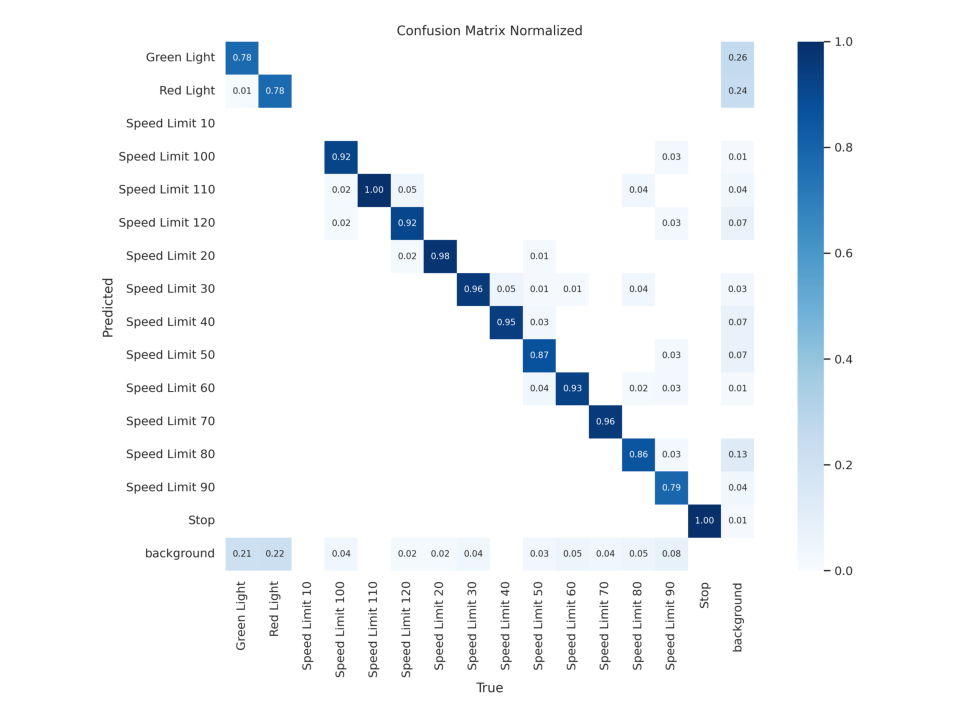

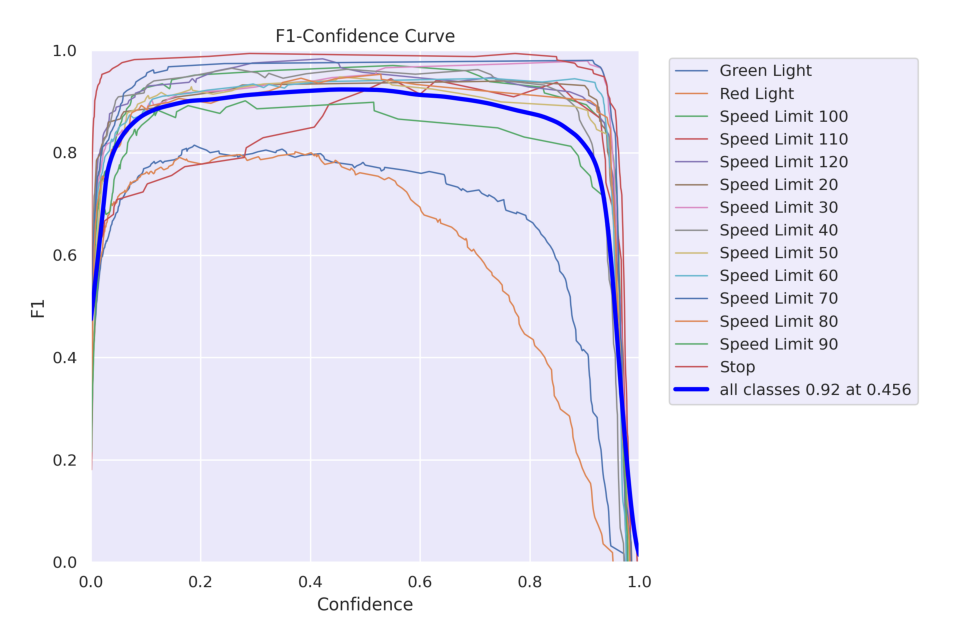

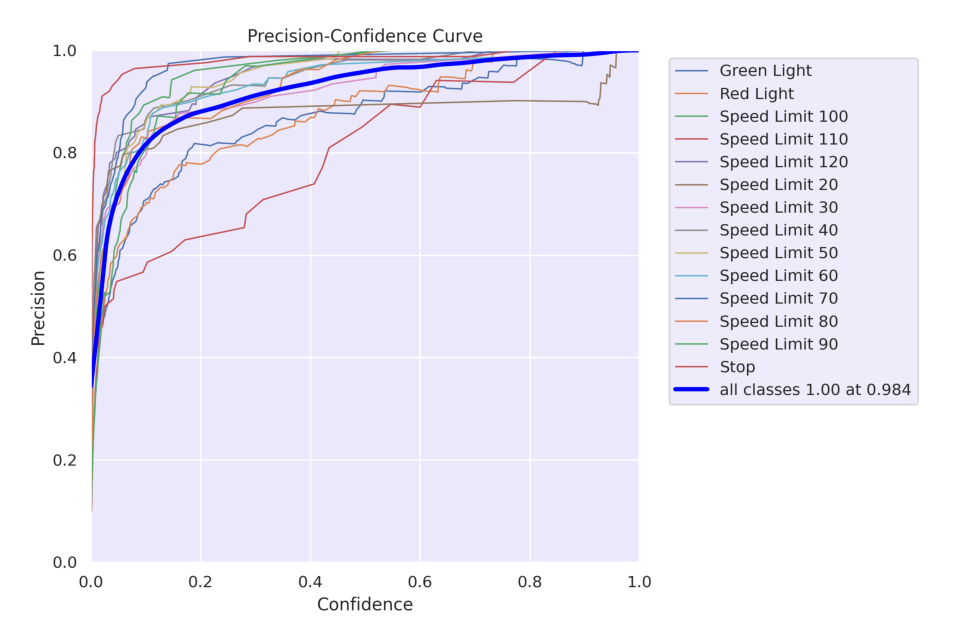

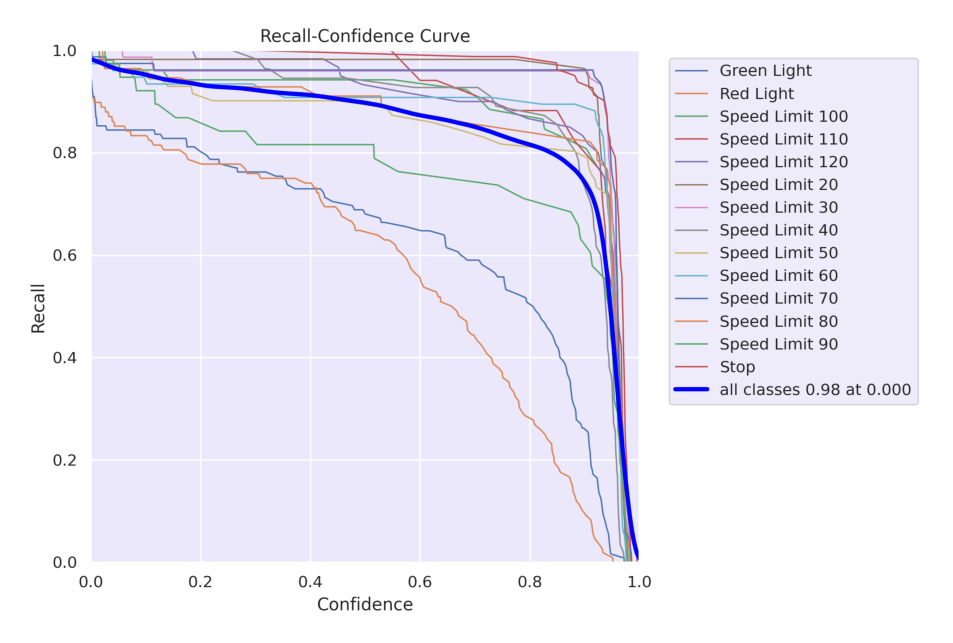

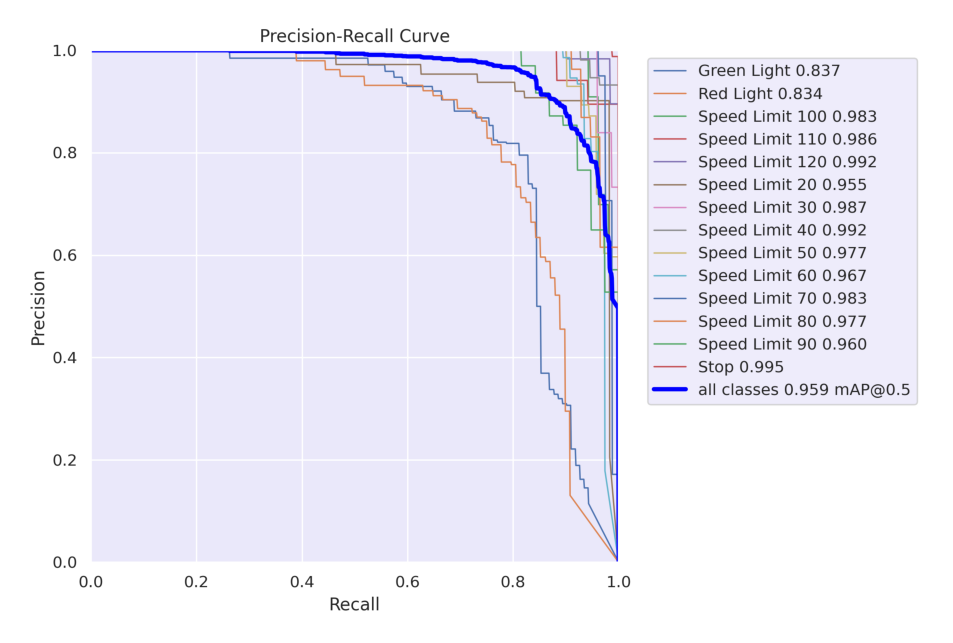

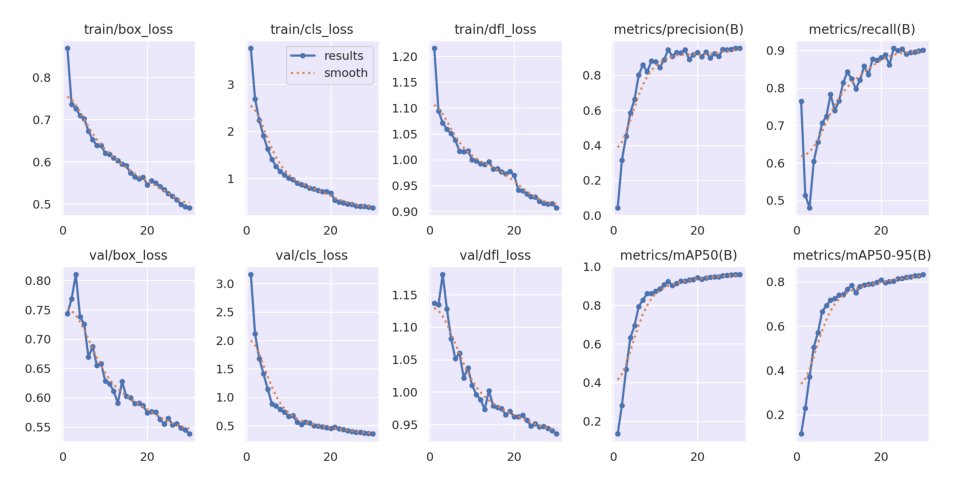

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)


In [ ]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
20                       21                  0.55546                  0.53661   
21                       22                  0.54992                  0.49687   
22                       23                  0.54172                  0.48497   
23                       24                  0.53446                  0.45836   
24                       25                  0.52473                  0.44517   
25                       26                  0.51852                  0.41721   
26                       27                  0.51052                  0.41113   
27                       28                  0.49936                  0.40604   
28                       29                  0.49354                  0.38699   
29                       30                  0.49135                  0.37794   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
20                  0.94115                  0.90697                  0.88838   
21                  0.93976                  0.93330                  0.86145   
22                  0.93387                  0.90023                  0.90590   
23                  0.92897                  0.92316                  0.89981   
24                  0.92770                  0.90841                  0.90405   
25                  0.91992                  0.94751                  0.89098   
26                  0.91605                  0.94616                  0.89451   
27                  0.91436                  0.94731                  0.89550   
28                  0.91535                  0.95413                  0.89878   
29                  0.90733                  0.95370                  0.90127   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
20                  0.93365                  0.79681                  0.57630   
21                  0.94080                  0.80086                  0.57538   
22                  0.94545                  0.80291                  0.56302   
23                  0.94730                  0.81438                  0.55505   
24                  0.94728                  0.81564                  0.56506   
25                  0.95219                  0.82022                  0.55341   
26                  0.95513                  0.82260                  0.55533   
27                  0.95693                  0.82815                  0.54829   
28                  0.95767                  0.82747                  0.54500   
29                  0.95909                  0.83324                  0.53844   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
20                  0.47583                  0.96211                 0.000179   
21                  0.44342                  0.96442                 0.000161   
22                  0.43225                  0.95644                 0.000144   
23                  0.41419                  0.94756                 0.000127   
24                  0.40034                  0.95128                 0.000109   
25                  0.38278                  0.94647                 0.000092   
26                  0.38832                  0.94714                 0.000075   
27                  0.37076                  0.94400                 0.000057   
28                  0.36175                  0.94082                 0.000040   
29                  0.35754                  0.93581                 0.000023   

                     lr/pg1                   lr/pg2  
20                 0.000179                 0.000179  
21                 0.000161                 0.000161  
22                 0.000144                 0.000144  
23                 0.000127                 0.000127  
24                 0.000109                 0.000109  
25                 0.000092                 0.000092  
26                 0.000075                 0.000075  
27            

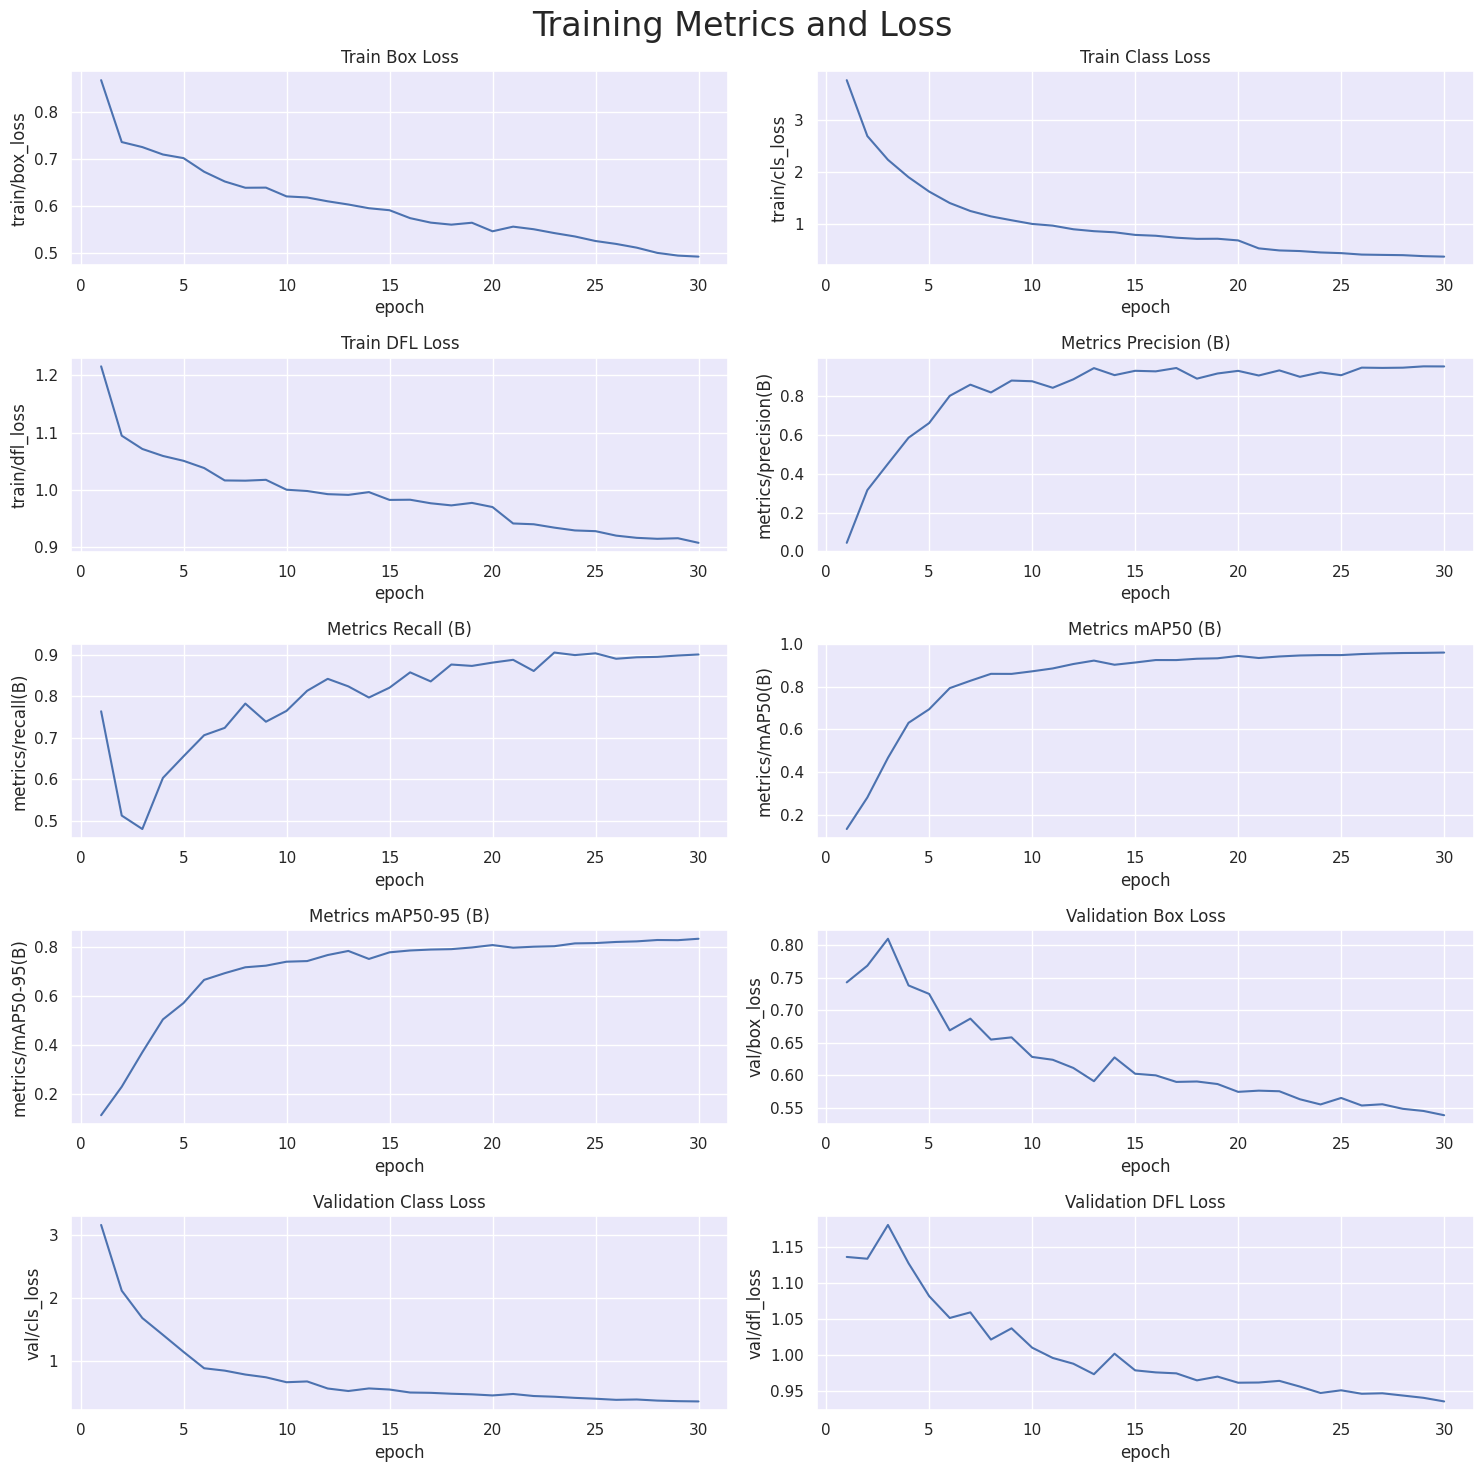

In [ ]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/trafficsign/car/valid/labels.cache... 801 images, 6 backgrounds, 0 corrupt: 100%|██████████| 807/807 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:18<00:00,  2.69it/s]


                   all        807        944      0.952      0.903       0.96      0.834
           Green Light         87        122      0.877      0.699      0.836      0.516
             Red Light         74        108      0.901      0.671      0.834      0.527
       Speed Limit 100         52         52      0.992      0.942      0.983      0.896
       Speed Limit 110         17         17      0.831          1      0.986      0.901
       Speed Limit 120         60         60      0.983      0.946      0.992      0.927
        Speed Limit 20         56         56      0.893      0.982      0.956      0.842
        Speed Limit 30         71         74      0.938      0.959      0.987      0.921
        Speed Limit 40         53         55      0.981      0.945      0.992      0.892
        Speed Limit 50         68         71          1        0.9      0.977      0.869
        Speed Limit 60         76         76      0.974      0.908      0.967      0.879
        Speed Limit 7


0: 640x640 1 Speed Limit 20, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 50, 8.6ms
Speed: 2.1ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 8.2ms
Speed: 2.3ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 8.3ms
Speed: 2.1ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 90, 8.4ms
Speed: 2.0ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 7.5ms
Speed: 2.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 110, 18.5ms
Speed: 2.7ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 90, 8.0ms
Speed: 2.4ms preprocess, 8.0ms inference, 1.8ms

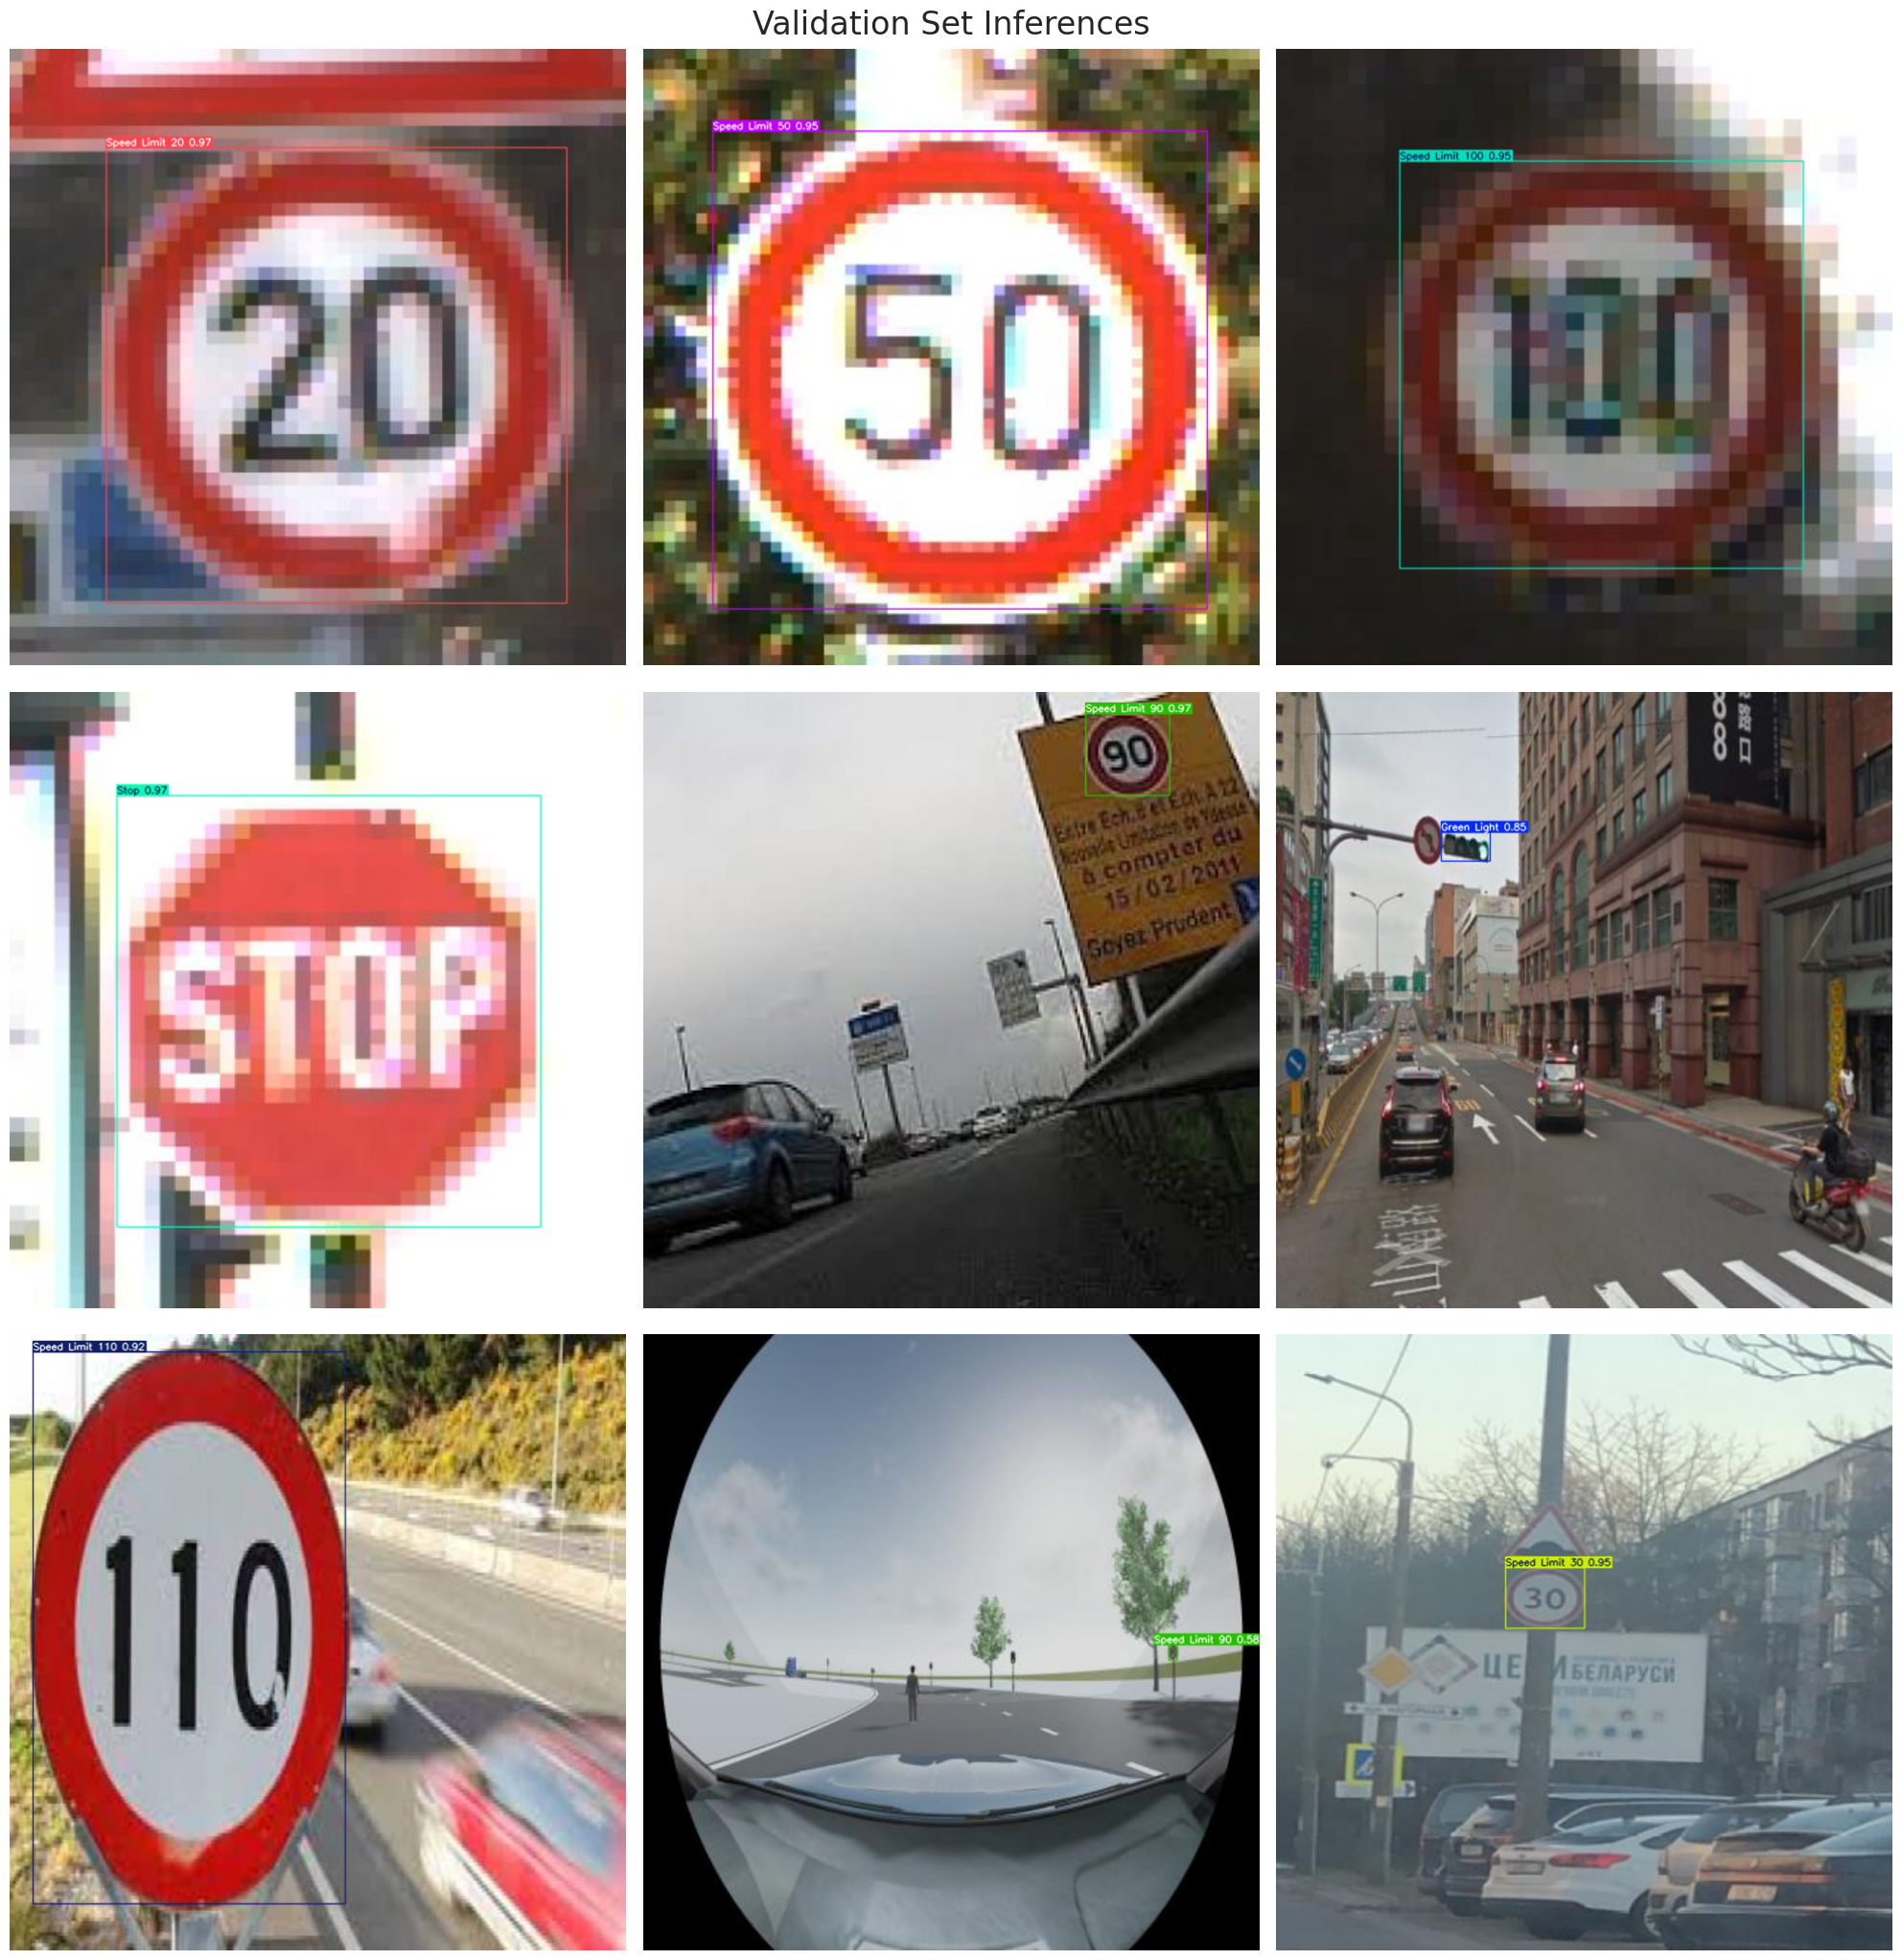

In [ ]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/drive/MyDrive/trafficsign/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
# Import necessary modules
import subprocess
import locale
from IPython.display import Video

# Ensure the locale is set to UTF-8
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Define the command to process the video with ffmpeg
input_video_path = '/content/drive/MyDrive/trafficsign/video.mp4'
output_video_path = 'output.mp4'
command = f'ffmpeg -y -loglevel panic -i {input_video_path} {output_video_path}'

# Run the ffmpeg command
subprocess.run(command, shell=True, check=True)

# Display the processed video
Video(output_video_path, width=960)


In [ ]:
# Use the model to detect signs
Valid_model.predict(source="/content/drive/MyDrive/trafficsign/video.mp4", show=True,save = True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

